# Hoeffding VFDT algorithm for online learning
### Very Fast Decision Tree Algorithms are used for online learning. Hoeffding algorithm is one of them, developed in 2010. 
### To run this code, we need first to install module scikit-multiflow
### pip install -U scikit-multiflow
### We will use SEAGenerator to generate the single steam with X dimension of 3 and Y dimention of 1.
### We will use Hoeffding Tree model for predcition and online (incrementally) training with the just seen data point generated by SEAGenerator.
### Main reference: https://towardsdatascience.com/incremental-online-learning-with-scikit-multiflow-6b846913a50b
### 2022-07-15

In [1]:
from skmultiflow.data import SEAGenerator
from skmultiflow.trees import HoeffdingTree
import matplotlib.pyplot as plt

## Create the stream generator

In [2]:
stream = SEAGenerator()      # create a stream
stream.prepare_for_use()     # prepare the stream for use

C:\Users\xinxue\AppData\Local\Continuum\anaconda3\lib\site-packages\skmultiflow\data\base_stream.py:194: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  category=FutureWarning)


## We sample nb_iters to further understand the singal

In [3]:
nb_iters = 100

In [4]:
X,Y = stream.next_sample(nb_iters)

In [5]:
X,Y

(array([[1.96813624, 8.00810965, 8.34787002],
        [7.23087564, 4.78431748, 8.41253991],
        [5.39806778, 8.77578903, 0.51283077],
        [2.76639609, 3.07973505, 4.88209864],
        [4.86303185, 8.61999896, 9.78175011],
        [0.08889063, 4.95651235, 5.07835596],
        [9.4548698 , 7.15826297, 7.43262049],
        [6.61656704, 7.45801437, 7.15397747],
        [8.62684729, 1.66802022, 8.01494038],
        [4.53842127, 6.02108029, 3.4922685 ],
        [9.94986367, 2.63872479, 7.79168375],
        [8.49401406, 0.47939175, 0.22938572],
        [8.90700395, 9.42694037, 0.87050022],
        [2.33811883, 8.9373546 , 9.69830576],
        [9.58324999, 2.03951217, 5.70159642],
        [6.68125946, 1.14860888, 0.97297034],
        [0.50115162, 8.45847506, 8.33988818],
        [6.06430037, 2.9410762 , 3.84239654],
        [4.14979968, 0.04144314, 4.43915273],
        [9.75527571, 4.44323159, 1.34011177],
        [1.84981179, 6.56585666, 6.43511531],
        [8.08355109, 2.80180857, 6

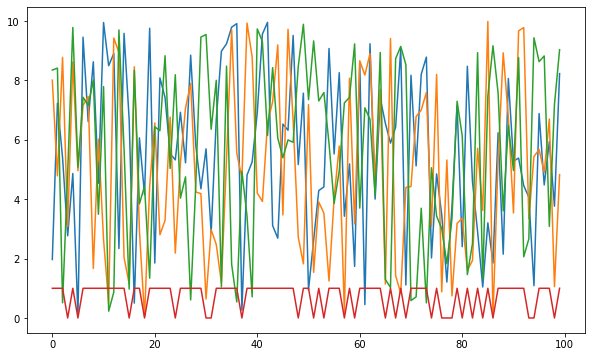

In [6]:
time = [i for i in range(0, nb_iters)]

plt.figure(figsize=(10, 6))
plt.plot(time, X, Y)

## Create the model

In [7]:
from skmultiflow.trees import HoeffdingTree
tree = HoeffdingTree()

C:\Users\xinxue\AppData\Local\Continuum\anaconda3\lib\site-packages\skmultiflow\trees\hoeffding_tree.py:35: FutureWarning: 'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.
The old name will be removed in v0.7.0
  "The old name will be removed in v0.7.0", category=FutureWarning)


## Pretrain the model

In [8]:
tree.fit(X, Y)

HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                        leaf_prediction='nba', max_byte_size=33554432,
                        memory_estimate_period=1000000, nb_threshold=0,
                        no_preprune=False, nominal_attributes=None,
                        remove_poor_atts=False, split_confidence=1e-07,
                        split_criterion='info_gain', stop_mem_management=False,
                        tie_threshold=0.05)

## Online learning in action

In [11]:
nb_iters = 10000

correctness_dist = []

for i in range(nb_iters):
   X, Y = stream.next_sample()        # get the next sample
   prediction = tree.predict(X)       # predict Y using the tree     
   if Y == prediction:                # check the prediction
     correctness_dist.append(1)
   else:
     correctness_dist.append(0) 

   tree.partial_fit(X, Y)             # update the tree

## Display the results of the model accuracy

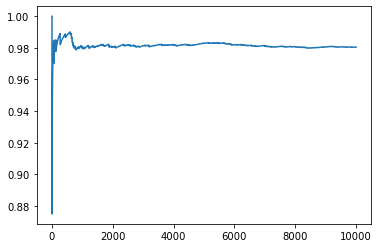

In [12]:
time = [i for i in range(1, nb_iters)]
accuracy = [sum(correctness_dist[:i])/len(correctness_dist[:i]) for i in range(1, nb_iters)]

plt.plot(time, accuracy)